# Data Analysis of a Store: A  Naive Approach

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df1=pd.read_excel('sales_data.xlsx')
df2=pd.read_excel('date.xlsx')

In [4]:
df1.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df2.head()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [6]:
print(df1.shape)
print(df2.shape)

(541909, 8)
(541909, 6)


It is thus clear that both the datasets have equal no. of rows. Also both dataframes have only timestamp column as common.I willconcatenate both these dataframes on timestamp column.For this the index of both these dataframes has to be the same


In [7]:

print(df1.index)
print(df2.index)

RangeIndex(start=0, stop=541909, step=1)
RangeIndex(start=0, stop=541909, step=1)


In [0]:
df3=pd.concat([df1,df2],axis=1)

In [9]:
df3.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [10]:
df3.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'transaction timestamp', 'unit price', 'customer id',
       'transaction country', 'timestamp              ', 'date', 'day_name',
       'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
transaction id             541909 non-null object
product id                 541909 non-null object
product description        540455 non-null object
quantity sold              541909 non-null int64
transaction timestamp      541909 non-null datetime64[ns]
unit price                 541909 non-null float64
customer id                406829 non-null float64
transaction country        541909 non-null object
timestamp                  541909 non-null datetime64[ns]
date                       541909 non-null datetime64[ns]
day_name                   541909 non-null object
day_of_month               541909 non-null int64
month_of_year              541909 non-null object
time_of_day(hh:mm:ss)      541909 non-null object
dtypes: datetime64[ns](3), float64(2), int64(2), object(7)
memory usage: 57.9+ MB


After the basic visual inspection from the data I have drawn some following insights about the data:

> 


1.Transaction id is unique for all transactions.Also transaction id is labelled with a prefix 'C' for cancelled transactions.

2.Product id is unique corresponding to the individual product.

3.Customer id is unique corresponding to the indivdual customer.It also contains some blank or null values.

4.Transaction country have different country names. As from visual inspection it appears that United Kingdom has featured in maximum transactions.

5.product description has the description of the product in Upper Case.

6.Quantity sold shows the number of products sold. For cancelled or returned products it has negative value.

7.Timestamp has time values in date,month,year and time.

8.Unit price shows the per product price.It also has some Zero values which indicates free products given.


In [0]:
df3.rename(index=str,columns={'timestamp              ':'timestamp'},inplace=True)

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 14 columns):
transaction id           541909 non-null object
product id               541909 non-null object
product description      540455 non-null object
quantity sold            541909 non-null int64
transaction timestamp    541909 non-null datetime64[ns]
unit price               541909 non-null float64
customer id              406829 non-null float64
transaction country      541909 non-null object
timestamp                541909 non-null datetime64[ns]
date                     541909 non-null datetime64[ns]
day_name                 541909 non-null object
day_of_month             541909 non-null int64
month_of_year            541909 non-null object
time_of_day(hh:mm:ss)    541909 non-null object
dtypes: datetime64[ns](3), float64(2), int64(2), object(7)
memory usage: 62.0+ MB


In [0]:
#dropping the 'transaction timestamp' column as we already have 'timestamp' column
df3.drop(labels='transaction timestamp',axis=1,inplace=True)

In [15]:
df3.shape

(541909, 13)

In [16]:
df3.head()

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


**Next task is to look for missing values.**



In [17]:
df3.isnull().sum()

transaction id                0
product id                    0
product description        1454
quantity sold                 0
unit price                    0
customer id              135080
transaction country           0
timestamp                     0
date                          0
day_name                      0
day_of_month                  0
month_of_year                 0
time_of_day(hh:mm:ss)         0
dtype: int64

In [18]:
df3.isnull().sum()/df3.shape[0]*100

transaction id            0.000000
product id                0.000000
product description       0.268311
quantity sold             0.000000
unit price                0.000000
customer id              24.926694
transaction country       0.000000
timestamp                 0.000000
date                      0.000000
day_name                  0.000000
day_of_month              0.000000
month_of_year             0.000000
time_of_day(hh:mm:ss)     0.000000
dtype: float64

**Thus 24.9%  of  'customer id' (135080 values) data is missing and 0.26%  of    'product description' (1454 values) data is missing**

**Observing the data with missing values.**

In [19]:
df3[df3['customer id'].isnull()].head()

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
622,536414,22139,NaN,56,0.00,NaN,United Kingdom,2010-12-01 11:52:00,2010-12-01,Wednesday,1,December,11:52:00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,2010-12-01 14:32:00,2010-12-01,Wednesday,1,December,14:32:00
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,2010-12-01 14:32:00,2010-12-01,Wednesday,1,December,14:32:00
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,2010-12-01 14:32:00,2010-12-01,Wednesday,1,December,14:32:00
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,2010-12-01 14:32:00,2010-12-01,Wednesday,1,December,14:32:00


**How many entries has missing product description if it has missing product id?**

In [20]:
df3[df3['customer id'].isnull()]['product description'].isnull().value_counts()

False    133626
True       1454
Name: product description, dtype: int64

**Hence all the null product description has null customer id but not vice versa. In this case if we drop null values we will lose 135080 rows which is equivalent to 25% of the data**

In [21]:
df3[df3['customer id'].isnull()].describe()

,quantity sold,unit price,customer id,day_of_month
count,135080.000000,135080.000000,0.0,135080.000000
mean,1.995573,8.076577,NaN,14.983847
std,66.696153,151.900816,NaN,8.695023
min,-9600.000000,-11062.060000,NaN,1.000000
25%,1.000000,1.630000,NaN,8.000000
50%,1.000000,3.290000,NaN,14.000000
75%,3.000000,5.450000,NaN,22.000000
max,5568.000000,17836.460000,NaN,31.000000


**Extreme outliers are visible in the IQR of quantity sold and unit price. Thus it is recommended to drop all the null values at this stage.**

In [0]:
df4=df3.dropna()

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
transaction id           406829 non-null object
product id               406829 non-null object
product description      406829 non-null object
quantity sold            406829 non-null int64
unit price               406829 non-null float64
customer id              406829 non-null float64
transaction country      406829 non-null object
timestamp                406829 non-null datetime64[ns]
date                     406829 non-null datetime64[ns]
day_name                 406829 non-null object
day_of_month             406829 non-null int64
month_of_year            406829 non-null object
time_of_day(hh:mm:ss)    406829 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 43.5+ MB


In [24]:
df4.head()

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [25]:
df4.describe()

,quantity sold,unit price,customer id,day_of_month
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,15.036128
std,248.693370,69.315162,1713.600303,8.653730
min,-80995.000000,0.000000,12346.000000,1.000000
25%,2.000000,1.250000,13953.000000,7.000000
50%,5.000000,1.950000,15152.000000,15.000000
75%,12.000000,3.750000,16791.000000,22.000000
max,80995.000000,38970.000000,18287.000000,31.000000


**Now as we know all the cancelled transactions have prefix 'C' attached to them in transaction id. And also negative value for the quantity sold for the same.We will figure out exactly how many cancelled transaction are present in our data currently.**

In [26]:
df4['CTransaction']=df4['transaction id'].astype('str')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df4['CTransaction']=np.where(df4['CTransaction'].apply(lambda x:x[0]=='C'),True,False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df4.CTransaction.value_counts()

False    397924
True       8905
Name: CTransaction, dtype: int64

**Thus 8905 transactioins are labelled cancelled.**

In [29]:
df4.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)',
       'CTransaction'],
      dtype='object')

**Also we know the data contains negative values in quantity sold. We have to see if the rows with negative values are same as the rows with 'C' prefix for cancelled transaction.**

In [30]:
df4[df4['quantity sold']>0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 14 columns):
transaction id           397924 non-null object
product id               397924 non-null object
product description      397924 non-null object
quantity sold            397924 non-null int64
unit price               397924 non-null float64
customer id              397924 non-null float64
transaction country      397924 non-null object
timestamp                397924 non-null datetime64[ns]
date                     397924 non-null datetime64[ns]
day_name                 397924 non-null object
day_of_month             397924 non-null int64
month_of_year            397924 non-null object
time_of_day(hh:mm:ss)    397924 non-null object
CTransaction             397924 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 42.9+ MB


**#The non negative values of quantity is same as the uncancelled transaction values**

In [31]:
df4.shape

(406829, 14)

In [32]:
df4[df4.CTransaction==False].describe()

,quantity sold,unit price,customer id,day_of_month
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,15.042181
std,180.420210,22.096788,1713.169877,8.653771
min,1.000000,0.000000,12346.000000,1.000000
25%,2.000000,1.250000,13969.000000,7.000000
50%,6.000000,1.950000,15159.000000,15.000000
75%,12.000000,3.750000,16795.000000,22.000000
max,80995.000000,8142.750000,18287.000000,31.000000


In [33]:
df4.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)',
       'CTransaction'],
      dtype='object')

In [34]:
#No of unique product ids
df4['product id'].nunique()

3684

In [0]:
#dropping the CTransaction(True,False) value column
df5= df4.loc[df4.CTransaction==False]
df5=df5.drop('CTransaction',axis=1)

In [36]:
df5.head()

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [37]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

In [38]:
#No of unique product ids after dropping the CTransaction column
df5['product id'].nunique()

3665

In [39]:
df5.shape

(397924, 13)

In [0]:
#Plotting the graph with product id-->quantity sold ,and product id--> quantity sold*unit price

**Plotting the bar plot below for 20 most sold products against its count** 

Text(0.5, 1.0, 'Common products')

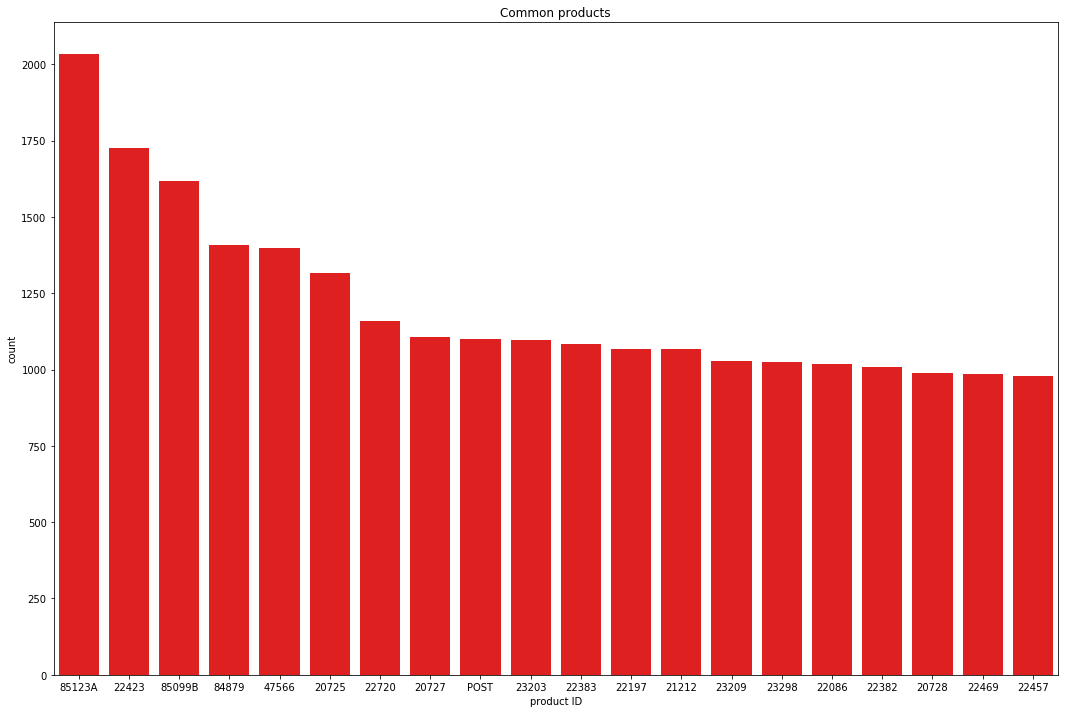

In [41]:
product_id = df5['product id'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(1,1,figsize=(18,12))
sns.barplot(product_id.iloc[0:20].index,
            product_id.iloc[0:20].values, color='Red')
ax.set_ylabel("count")
ax.set_xlabel("product ID")
ax.set_title('Common products')

**Plotting the distribution plot below for the frequency of the above listed products against their count.**

Text(0, 0.5, 'Frequency')

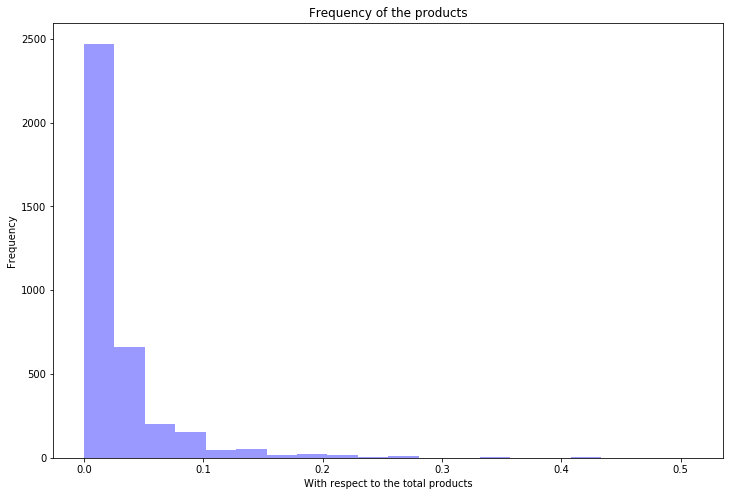

In [42]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.distplot(np.round(product_id/df5.shape[0]*100,2), kde=False,bins=20,color="Blue")
ax.set_title("Frequency of the products")
ax.set_xlabel("With respect to the total products")
ax.set_ylabel("Frequency")

In [43]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

In [44]:
#No of unique customers
df5['customer id'].nunique()

4339

In [45]:
#No of unique countries of transaction
df5['transaction country'].nunique()

37

In [46]:
#Top 20 countries with  maximum transactions.
country=df5['transaction country'].value_counts()
country.head(20)

United Kingdom     354345
Germany              9042
France               8342
EIRE                 7238
Spain                2485
Netherlands          2363
Belgium              2031
Switzerland          1842
Portugal             1462
Australia            1185
Norway               1072
Italy                 758
Channel Islands       748
Finland               685
Cyprus                614
Sweden                451
Austria               398
Denmark               380
Poland                330
Japan                 321
Name: transaction country, dtype: int64

**Plotting a bar plot below for Top 10 countries against their transaction count**

Text(0, 0.5, 'Count')

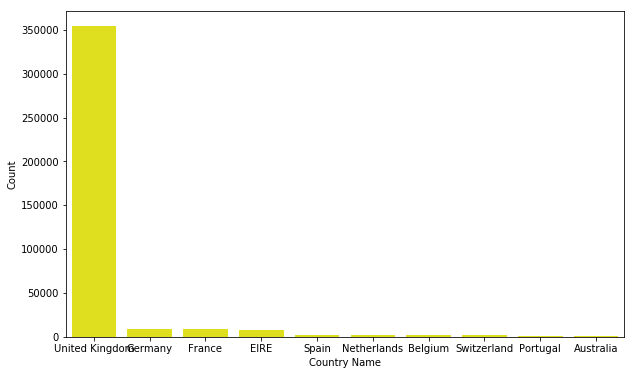

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(country.iloc[0:10].index,country.iloc[0:10].values,color='Yellow')
plt.xlabel('Country Name')
plt.ylabel('Count')


In [48]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

In [49]:
month=df5.groupby('transaction id')['month_of_year'].unique().value_counts()
print(month)

[November]     2658
[December]     2178
[October]      1929
[September]    1756
[May]          1555
[June]         1393
[July]         1331
[March]        1321
[August]       1281
[April]        1149
[February]      998
[January]       987
Name: month_of_year, dtype: int64


**So as we see here November and December has maximum number of transactions.January and february has least transactions.This is strange because only within duration of 4 months the company watches the highest and lowest of their sales for the company.**

In [50]:
print(month.values)

[2658 2178 1929 1756 1555 1393 1331 1321 1281 1149  998  987]


**Plotting the transactions of different months in a bar plot.**

Text(0.5, 1.0, 'Transactions in different Months')

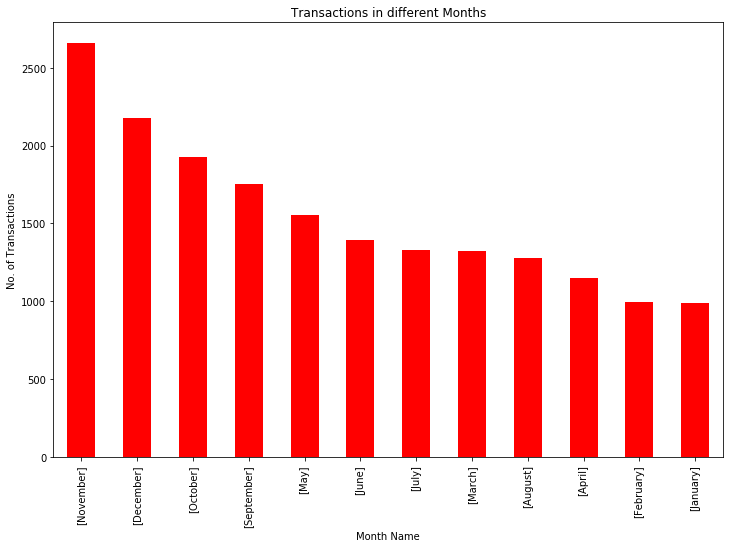

In [51]:
mnt=month.plot('bar',color='Red',figsize=(12,8))
mnt.set_xlabel('Month Name')
mnt.set_ylabel('No. of Transactions')
mnt.set_title('Transactions in different Months')

In [52]:
#Transactions on different day of the month
dayofmonth=df5.groupby('transaction id')['day_of_month'].unique().value_counts().sort_index()
print(dayofmonth)

[1]     709
[2]     613
[3]     520
[4]     629
[5]     723
[6]     801
[7]     773
[8]     771
[9]     660
[10]    627
[11]    629
[12]    507
[13]    596
[14]    670
[15]    553
[16]    650
[17]    694
[18]    572
[19]    519
[20]    661
[21]    594
[22]    564
[23]    579
[24]    583
[25]    562
[26]    447
[27]    546
[28]    624
[29]    404
[30]    443
[31]    313
Name: day_of_month, dtype: int64


**Plotting the transactions for all the days of the month in bar plot.**

Text(0.5, 1.0, 'Transactions per day of the month')

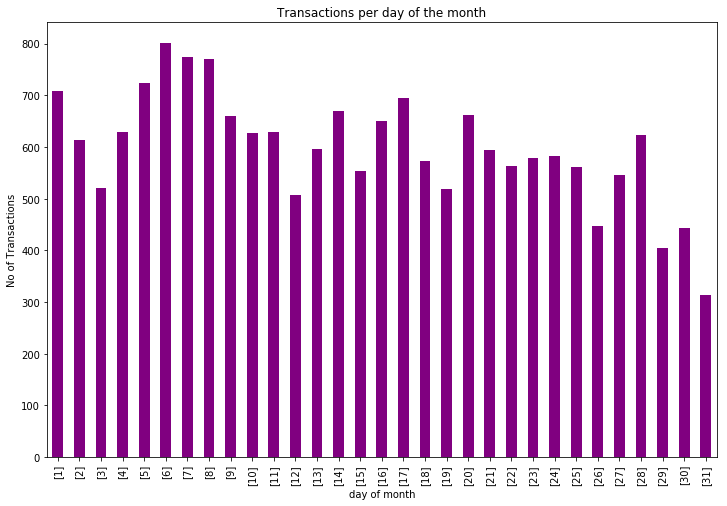

In [53]:
dom=dayofmonth.plot('bar',color='purple',figsize=(12,8))
dom.set_xlabel('day of month')
dom.set_ylabel('No of Transactions')
dom.set_title('Transactions per day of the month')

**It is clear from the visualisation that 6th day of the month shows the maximum transactions whereas the last day has the least transactions**

In [54]:
#Transactions on different day of the week
weekday=df5.groupby('transaction id')['day_name'].unique().value_counts().sort_values()
print(weekday)

[Sunday]       2169
[Friday]       2831
[Monday]       2863
[Tuesday]      3185
[Wednesday]    3455
[Thursday]     4033
Name: day_name, dtype: int64


**Plotting a bar plot for the number of transactions on different days of the week.**

Text(0.5, 1.0, 'Transaction per week day')

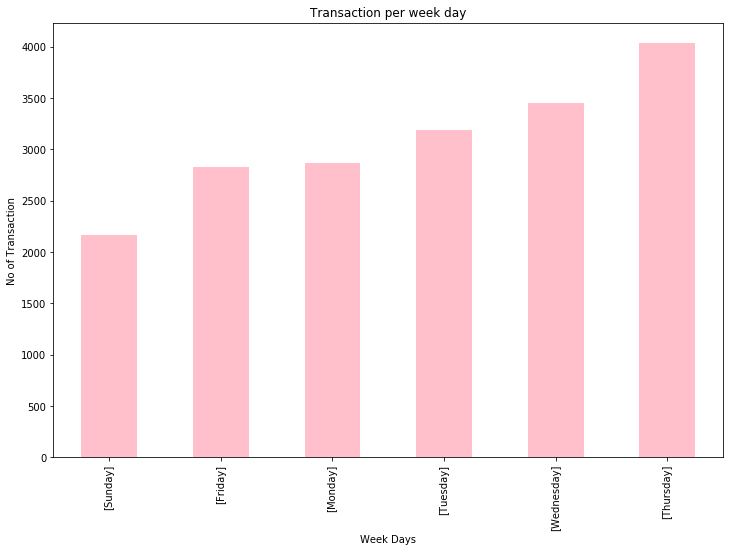

In [55]:
wd=weekday.plot('bar',color='pink',figsize=(12,8))
wd.set_xlabel('Week Days')
wd.set_ylabel('No of Transaction')
wd.set_title('Transaction per week day')

**Thus it is evident from the graph that Thursdays have the max transactions and Sundays have the lowest. Also there is no transaction on Saturday which states that the store is closed on Saturday.**

In [0]:
df5.rename(columns={'time_of_day(hh:mm:ss)':'time_of_day'},inplace=True)

In [57]:
df5.head()

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [58]:
df5.groupby('transaction id')['time_of_day'].unique().value_counts()

[12:21:00]              67
[12:00:00]              65
[12:41:00]              64
[13:46:00]              64
[11:41:00]              62
[12:44:00]              62
[12:26:00]              61
[11:38:00]              61
[12:16:00]              60
[12:36:00]              60
[12:50:00]              60
[12:11:00]              60
[10:38:00]              60
[12:06:00]              60
[12:12:00]              59
[12:25:00]              59
[12:42:00]              59
[12:29:00]              59
[12:46:00]              59
[12:47:00]              58
[12:45:00]              57
[11:49:00]              57
[13:20:00]              56
[12:24:00]              56
[13:28:00]              55
[12:05:00]              55
[12:19:00]              55
[11:34:00]              55
[12:13:00]              55
[12:18:00]              55
                        ..
[13:40:00, 13:41:00]     1
[11:59:00, 12:00:00]     1
[14:55:00, 14:56:00]     1
[18:34:00]               1
[19:31:00]               1
[16:57:00, 16:58:00]     1
[

In [0]:
#Breaking the time into hours 

In [60]:
df5.shape

(397924, 13)

In [61]:
df5.head()

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [0]:
df5.insert(loc=13, column='hours', value=df5.timestamp.dt.hour)

In [63]:
df5.head(2)

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,hours
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8


In [64]:
df5.shape

(397924, 14)

In [65]:
hours=df5.groupby('transaction id')['hours'].unique().value_counts()
print(hours)

[12]        3129
[13]        2637
[11]        2276
[14]        2275
[10]        2226
[15]        2038
[9]         1394
[16]        1100
[8]          555
[17]         544
[18]         169
[19]         144
[7]           29
[20]          18
[6]            1
[11, 12]       1
Name: hours, dtype: int64


**Plotting the graph for transactions on different hours of the day.**

Text(0.5, 1.0, 'No of unique transactions at different hours of the day')

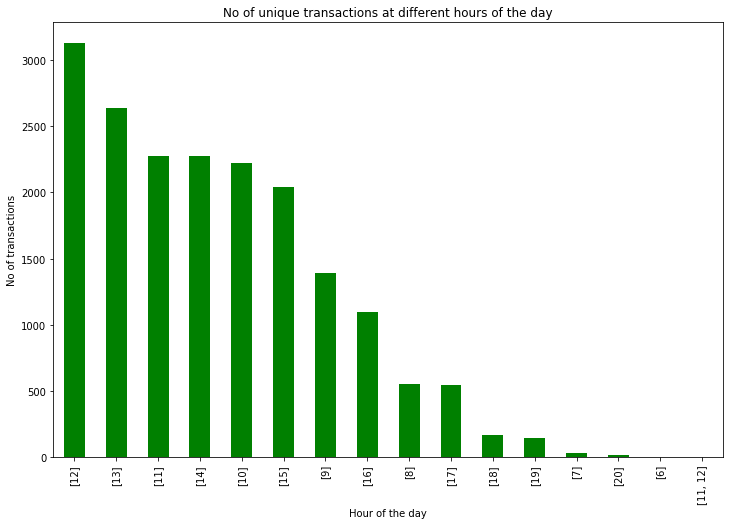

In [66]:
hrs=hours.plot('bar',color='green',figsize=(12,8))
hrs.set_xlabel('Hour of the day')
hrs.set_ylabel('No of transactions')
hrs.set_title('No of unique transactions at different hours of the day')

**It is observed here that the transaction count is at its peak between 12pm to 13 pm  and is lowest between at 8 pm and 6 am.**

In [67]:
df5.head(2)

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,hours
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8


In [0]:
#Income column for the revenue generated
df5['Income']=df5['unit price']*df5['quantity sold']

In [69]:
df5.head(3)

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,hours,Income
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8,22.00


In [70]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day', 'hours',
       'Income'],
      dtype='object')

In [0]:
#Renaming 'Incoming' column to 'Revenue' :)
df5.rename(columns={'Income':'Revenue'},inplace=True)

In [72]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day', 'hours',
       'Revenue'],
      dtype='object')

In [73]:
CRevenue=df5.groupby('transaction country')['Revenue'].sum()
CRevenue

transaction country
Australia               1.385213e+05
Austria                 1.019868e+04
Bahrain                 5.484000e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.045044e+04
Cyprus                  1.359038e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.655459e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.090240e+05
Germany                 2.288671e+05
Greece                  4.760520e+03
Iceland                 4.310000e+03
Israel                  7.221690e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.334650e+03
Portugal          

**Plotting a graph for Revenue generated from the countries.**

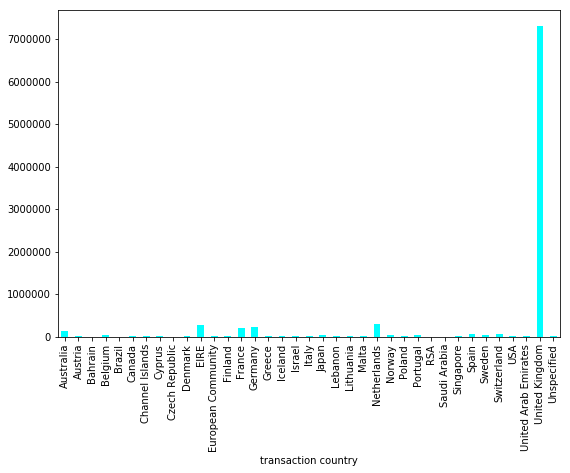

In [74]:
CRevenue.plot('bar',color='cyan',figsize=(9,6))

**As we have seen earlier U.K. has maximum transactions from the store it is clearly visible in the revenue plot as well. U.K. contributes the amximunm to the store for revenue generation.**

In [75]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day', 'hours',
       'Revenue'],
      dtype='object')

**Plotting the graph of Revenue against product id which shows the top 30 products contributing towards the revenue geneartion to the store.**

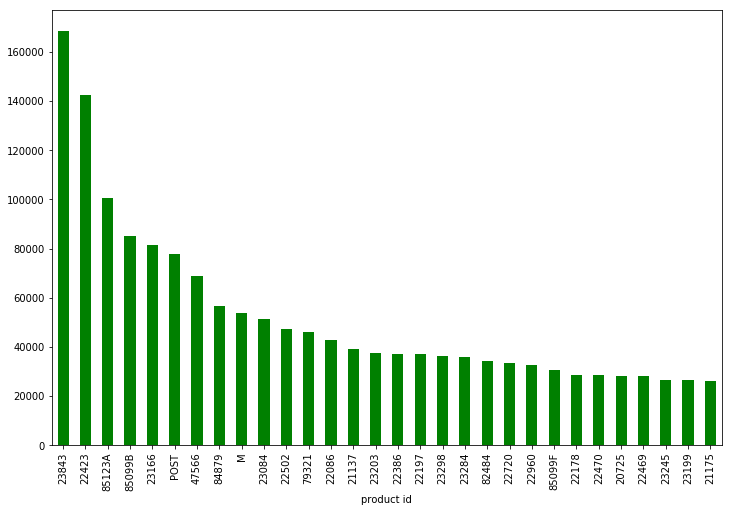

In [76]:
prodRevenue=df5.groupby('product id')['Revenue'].sum().sort_values(ascending=False).iloc[:30]
prodRevenue.plot('bar',color='green',figsize=(12,8))

**Plotting Revenue against customer id graph to identify the 30 elite customers to the company.**

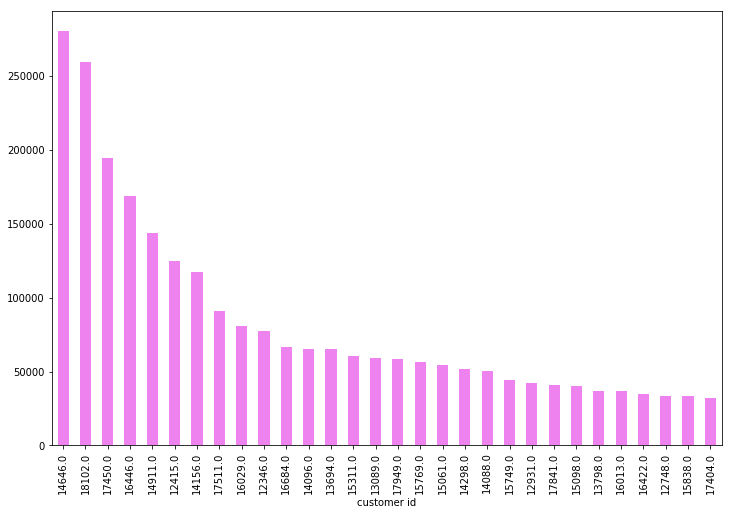

In [77]:
custRevenue=df5.groupby('customer id')['Revenue'].sum().sort_values(ascending=False).iloc[:30]
custRevenue.plot('bar',color='violet',figsize=(12,8))

In [78]:
df5[df5['customer id']==14646].head(20)

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,hours,Revenue
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,0.29,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,3.48
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,0.29,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,3.48
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,4.95,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,9.90
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,1.95,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,1.95
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,0.85,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,1.70
37957,539491,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2.10,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,2.10
37958,539491,21246,RED RETROSPOT BIG BOWL,2,4.95,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,9.90
37959,539491,22960,JAM MAKING SET WITH JARS,1,4.25,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,4.25
37960,539491,22355,CHARLOTTE BAG SUKI DESIGN,2,0.85,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,1.70
37961,539491,21123,SET/10 IVORY POLKADOT PARTY CANDLES,2,1.25,14646.0,Netherlands,2010-12-20 10:09:00,2010-12-20,Monday,20,December,10:09:00,10,2.50


In [79]:
df5[df5['customer id']==14646].groupby('transaction country').nunique()['transaction country'].index[0]


'Netherlands'

**It is seen here that the top customers who contributes the maximum to the company in terms of Revenue generation is from Netherland.We will see the transaction country of other elite customers as well.**

In [80]:
for i in custRevenue.index:
    print('The Country of the customer with customer id '+ str(i) +' is: ',df5[df5['customer id']==i].head(50).groupby('transaction country').nunique()['transaction country'].index[0])
  

The Country of the customer with customer id 14646.0 is:  Netherlands
The Country of the customer with customer id 18102.0 is:  United Kingdom
The Country of the customer with customer id 17450.0 is:  United Kingdom
The Country of the customer with customer id 16446.0 is:  United Kingdom
The Country of the customer with customer id 14911.0 is:  EIRE
The Country of the customer with customer id 12415.0 is:  Australia
The Country of the customer with customer id 14156.0 is:  EIRE
The Country of the customer with customer id 17511.0 is:  United Kingdom
The Country of the customer with customer id 16029.0 is:  United Kingdom
The Country of the customer with customer id 12346.0 is:  United Kingdom
The Country of the customer with customer id 16684.0 is:  United Kingdom
The Country of the customer with customer id 14096.0 is:  United Kingdom
The Country of the customer with customer id 13694.0 is:  United Kingdom
The Country of the customer with customer id 15311.0 is:  United Kingdom
The Co

In [81]:
df5.head(2)

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,hours,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,8,20.34


**Ploting Month against Revenue graph.**

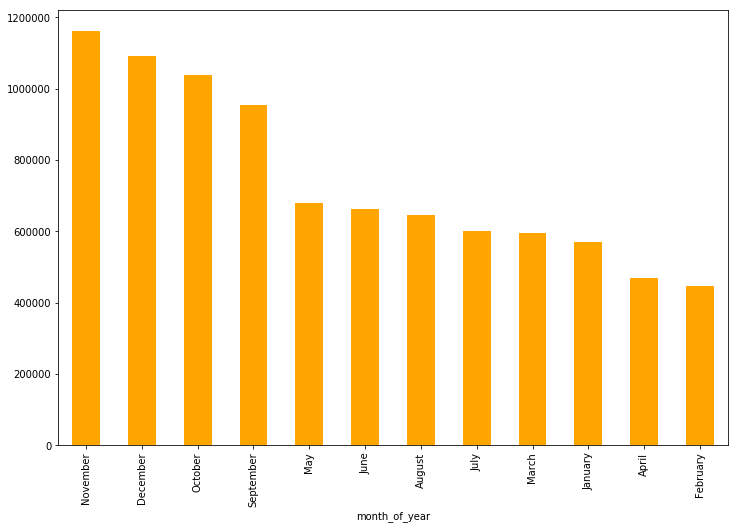

In [82]:
monthRevenue=df5.groupby('month_of_year')['Revenue'].sum().sort_values(ascending=False)
monthRevenue.plot('bar',color='orange',figsize=(12,8))

**Thus similar to the transaction-->Month plot this plot also states the same. Month November ,December shows maximum revenues whereas january and February shows a downfall in revenues.**

**Plotting Day of the week against Revenue graph.**

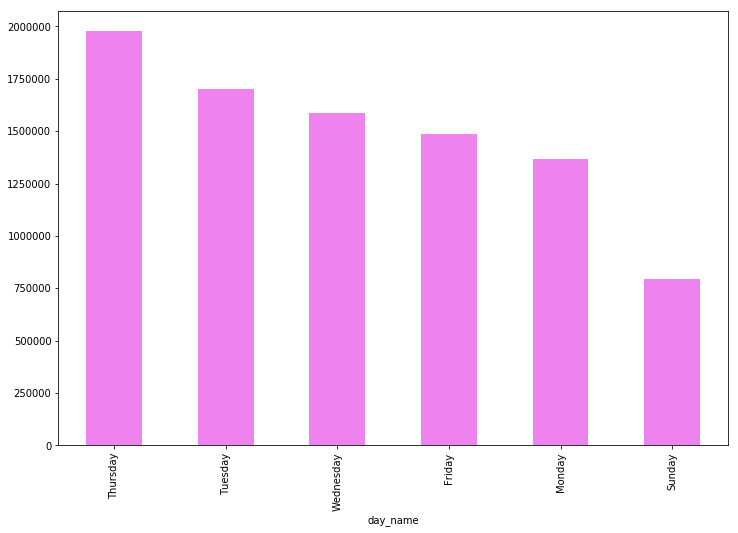

In [83]:
dayRevenue=df5.groupby('day_name')['Revenue'].sum().sort_values(ascending=False)
dayRevenue.plot('bar',color='violet',figsize=(12,8))

**Thus Thursdays and Tuesdays the top maximum revenue generation days and Sundays and Mondays show a downfall.**

In [84]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day', 'hours',
       'Revenue'],
      dtype='object')

**Plotting a graph for day of the month against Revenue**

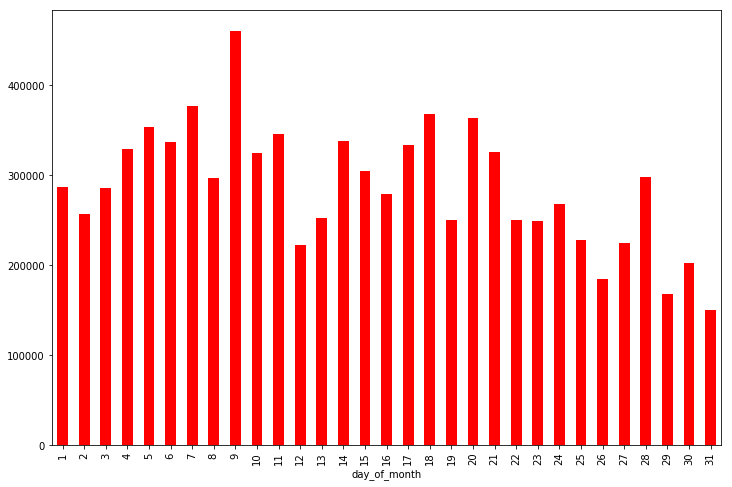

In [85]:
domRevenue=df5.groupby('day_of_month')['Revenue'].sum().sort_index()
domRevenue.plot('bar',color='red',figsize=(12,8))

**This graph shows somewhat different results than transactions-->Day of the month graph.9th day of the month shows the peak in revenues followed by 7th and 8th day.9th day has 4th highest number of transactions in the month.**

**Plotting Hour of the day against Revenue graph.**

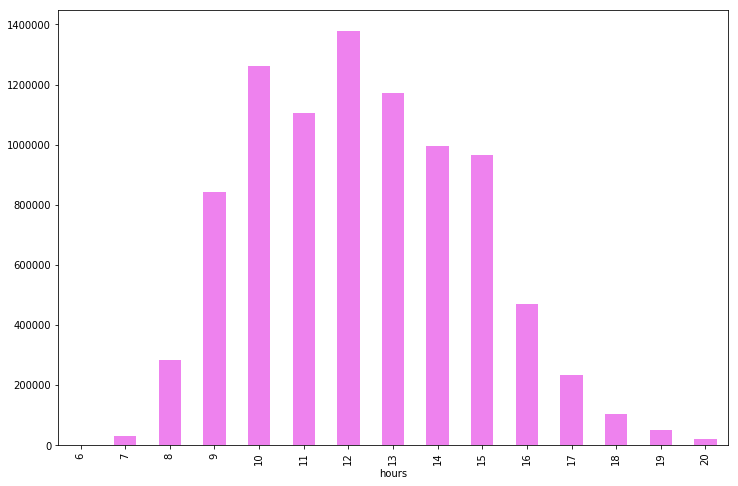

In [86]:
hourRevenue=df5.groupby('hours')['Revenue'].sum().sort_index()
hourRevenue.plot('bar',color='violet',figsize=(12,8))

**The results of this plot coincides with the results of the day of the week against Transasction graph.**

In [87]:
df5.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day', 'hours',
       'Revenue'],
      dtype='object')

In [88]:
df5['unit price'].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit price, dtype: float64

**min value = 0 suggests that freebies given or no amount generated from the sale**

In [89]:
df5[df5['unit price']==0].shape[0]

40

**40 instances of freebies given**

In [0]:
df6=df5[df5['unit price']==0]

In [91]:
df6.head(2)

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,hours,Revenue
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,12647.0,Germany,2010-12-05 14:02:00,2010-12-05,Sunday,5,December,14:02:00,14,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,16560.0,United Kingdom,2010-12-16 14:36:00,2010-12-16,Thursday,16,December,14:36:00,14,0.0


In [92]:
df6.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'unit price', 'customer id', 'transaction country', 'timestamp', 'date',
       'day_name', 'day_of_month', 'month_of_year', 'time_of_day', 'hours',
       'Revenue'],
      dtype='object')

In [93]:
df6['day_name'].value_counts()

Thursday     17
Friday        9
Monday        6
Wednesday     3
Tuesday       3
Sunday        2
Name: day_name, dtype: int64

**Thus on thursdays maximum freebies are given. Thursdays also observes the day with maximum transactions and maximum revenue generation.**

In [0]:
freemonth=df6['month_of_year'].value_counts()

**Plotting Month agaisnt freebies given**

Text(0.5, 1.0, 'freebies per month')

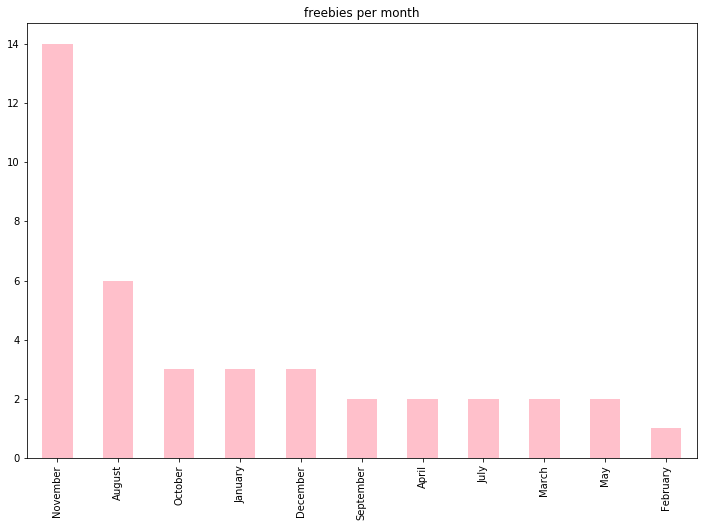

In [95]:
fm=freemonth.plot('bar',color='pink',figsize=(12,8))
fm.set_title('freebies per month')

**November with a maximum transactions and revenue generation observes maximum free sale as well. Whereas June observes no free sale.**

**Lets take a look which customers have recieved freebies.**

In [96]:
freecustomer=df6['customer id'].value_counts()
freecustomer

13081.0    4
14646.0    4
12415.0    2
14911.0    2
13985.0    2
14110.0    1
13113.0    1
14410.0    1
18059.0    1
12507.0    1
12603.0    1
13014.0    1
15107.0    1
13256.0    1
12748.0    1
16560.0    1
16406.0    1
17667.0    1
12457.0    1
12431.0    1
16133.0    1
17560.0    1
12446.0    1
15804.0    1
16818.0    1
12444.0    1
15581.0    1
13239.0    1
15602.0    1
12437.0    1
12647.0    1
Name: customer id, dtype: int64

**custRevenue is a list of top  30 customers  as stated in the above graph of Customer id against Revenue who has purchased the most from the store. These are elite customers to the store.**

In [0]:
#We will see how many of them have recieved freebies from the store.
l=[]
for i in custRevenue.index:
    if i in freecustomer.index:
        l.append(i)

In [98]:
l

[14646.0, 14911.0, 12415.0, 12748.0]

In [99]:
for i in l:
    print('The number of times any free product served to the customer '+str(i)+' is : ',freecustomer[freecustomer.index==i].values)

The number of times any free product served to the customer 14646.0 is :  [4]
The number of times any free product served to the customer 14911.0 is :  [2]
The number of times any free product served to the customer 12415.0 is :  [2]
The number of times any free product served to the customer 12748.0 is :  [1]


**Thus 4 of the elite customers have recieved freebies in total 9 instances.Thus 20% of the total freebies were distributed to the elite customers(top 30 customers).**

In [100]:
df6.head(10)

,transaction id,product id,product description,quantity sold,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,hours,Revenue
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,12647.0,Germany,2010-12-05 14:02:00,2010-12-05,Sunday,5,December,14:02:00,14,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,16560.0,United Kingdom,2010-12-16 14:36:00,2010-12-16,Thursday,16,December,14:36:00,14,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,0.0,14911.0,EIRE,2010-12-21 13:45:00,2010-12-21,Tuesday,21,December,13:45:00,13,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,0.0,13081.0,United Kingdom,2011-01-06 16:41:00,2011-01-06,Thursday,6,January,16:41:00,16,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,0.0,13081.0,United Kingdom,2011-01-06 16:41:00,2011-01-06,Thursday,6,January,16:41:00,16,0.0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,0.0,15107.0,United Kingdom,2011-01-13 15:10:00,2011-01-13,Thursday,13,January,15:10:00,15,0.0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,0.0,17560.0,United Kingdom,2011-02-10 13:08:00,2011-02-10,Thursday,10,February,13:08:00,13,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,0.0,13239.0,United Kingdom,2011-03-23 10:25:00,2011-03-23,Wednesday,23,March,10:25:00,10,0.0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,0.0,13113.0,United Kingdom,2011-03-30 12:45:00,2011-03-30,Wednesday,30,March,12:45:00,12,0.0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,0.0,14410.0,United Kingdom,2011-04-04 14:42:00,2011-04-04,Monday,4,April,14:42:00,14,0.0


**Conclusion**
1. Is the company's performance improving or degrading over time?

--> Based on this naive approach it is observed that company's performance is improving. However this requires the implementation of time -series data to confidently come to binary conclusion.

2. Customer Loyalty and Customer Acquisition

--> Customer loyalty can be seen from the transaction-->customer id plot and revenue -->customer id plot

-->Customer acquisition can be boosted with the attractive discounts or freebies. In this case 20% freebies are given to the elite customers which is not actually advisable. Instead if that amount of free products are given to the other customers that may have lead to the larger customer base for the higher revenue generation.Although RFM principle has to be taken into account for free sale of product which is not covered in this naive approach.


3. Out of stock situations 

--> Out of stock situation arises for some products which are most sellable.


4. What kind of customers mostly buy from the store?

-->Customers mostly from U.K. and surrounding regions are the frequent buyers.